# Oil-DAX/Nikkei Correlation

In [2]:
import pandas as pd
import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
API_TOKEN = os.environ.get("API_TOKEN")
import quandl
quandl.ApiConfig.api_key = API_TOKEN

In [40]:
cl = quandl.get("CHRIS/CME_QM1")
lh = quandl.get("FSE/LHA_X")
nk = quandl.get("NIKKEI/ALL_STOCK")
dax = quandl.get("CHRIS/EUREX_FDAX2")

In [35]:
print(dj.describe())
dj.tail()

             Close
count  2141.000000
mean    435.180224
std     146.916983
min     233.630000
25%     277.960000
50%     435.940000
75%     564.430000
max     730.380000


,Close
Date,
2018-09-14,670.30
2018-09-18,682.08
2018-09-19,691.66
2018-09-20,692.25
2018-09-21,698.35


In [26]:
cl.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2018-09-14,68.775,69.900,67.950,69.000,0.40,68.99,18017.0,1569.0
2018-09-17,69.000,69.725,68.525,68.775,0.08,68.91,12376.0,1468.0
2018-09-18,68.800,70.425,68.525,69.750,0.94,69.85,10614.0,1216.0
2018-09-19,69.675,71.150,69.650,71.125,1.27,71.12,1220.0,1052.0
2018-09-20,70.975,71.350,70.050,70.175,0.45,70.32,13989.0,1775.0


In [43]:
dax.describe()

,Open,High,Low,Settle,Volume,Prev. Day Open Interest
count,5535.00000,5535.000000,5535.000000,5535.000000,5535.000000,5535.000000
mean,6830.09290,6880.631888,6773.695845,6842.178952,6597.137669,21638.547425
std,2664.16052,2674.677565,2652.486218,2660.917551,21816.418225,38060.444804
min,0.00000,0.000000,0.000000,2214.000000,0.000000,0.000000
25%,4883.50000,4920.250000,4812.250000,4875.250000,199.500000,5478.000000
50%,6235.00000,6279.000000,6181.000000,6236.500000,466.000000,9419.000000
75%,8142.00000,8178.500000,8090.500000,8140.500000,1494.500000,16085.000000
max,13596.00000,13611.000000,13552.000000,13576.000000,277301.000000,334295.000000


In [62]:
es_settle = es.Settle
cl_settle = cl.Settle
cl_settle.head()

Date
2014-03-05    101.45
2014-03-06    101.56
2014-03-07    102.58
2014-03-11    100.03
2014-03-12     97.99
Name: Settle, dtype: float64

Populating the interactive namespace from numpy and matplotlib


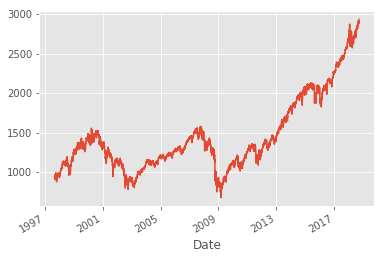

In [63]:
# use new pretty plots
matplotlib.style.use('ggplot')
# get ipython notebook to show graphs
%pylab inline

es_settle.plot()

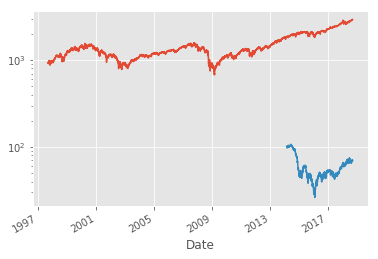

In [64]:
plt.figure()
es_settle.plot()
cl_settle.plot()
plt.yscale('log')

In [65]:
es_settle.corr(cl_settle)

-0.08497378802718977

In [44]:
df = cl.Settle.to_frame('cl').join(lh.Close.to_frame('lh')).join(dax.Settle.to_frame('dax')).join(nk.Close.to_frame('nk')).dropna()

In [45]:
df_ = df / df.iloc[0]

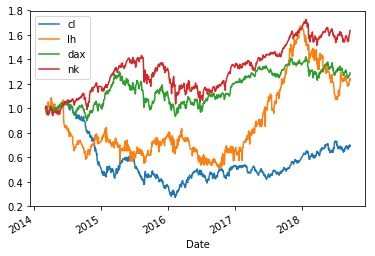

In [46]:
df_.plot()

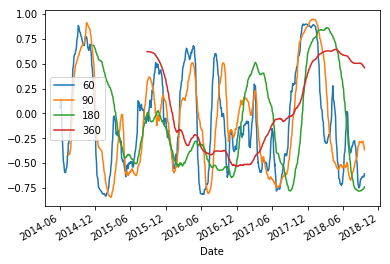

In [20]:
for i in [60,90,180,360]:
    df.lh.rolling(window=i).corr(df.cl).plot(label=i)
plt.legend()

/Users/ubreu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ubreu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


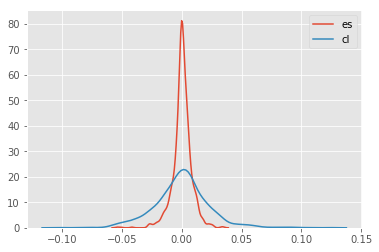

In [80]:
sns.kdeplot(df.es.pct_change())
sns.kdeplot(df.cl.pct_change())

252 = number of trading days?

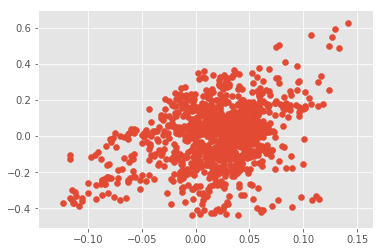

In [117]:
k = 50
plt.scatter(df.es.pct_change(k), df.cl.pct_change(k))

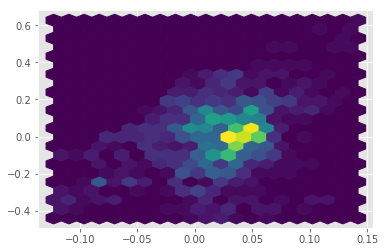

In [118]:
plt.hexbin(df.es.pct_change(k), df.cl.pct_change(k), gridsize=20)

,cl,lh,dax,nk
count,1049.000000,1049.000000,1049.000000,1049.000000
mean,58.885539,16.426835,11114.594852,555.695138
std,19.084300,5.522986,1267.341132,82.815408
min,27.450000,9.500000,8582.500000,398.900000
25%,46.400000,12.335000,9936.500000,490.510000
50%,51.840000,13.980000,10996.000000,559.360000
75%,66.730000,20.000000,12255.000000,610.760000
max,106.910000,31.260000,13576.000000,730.380000


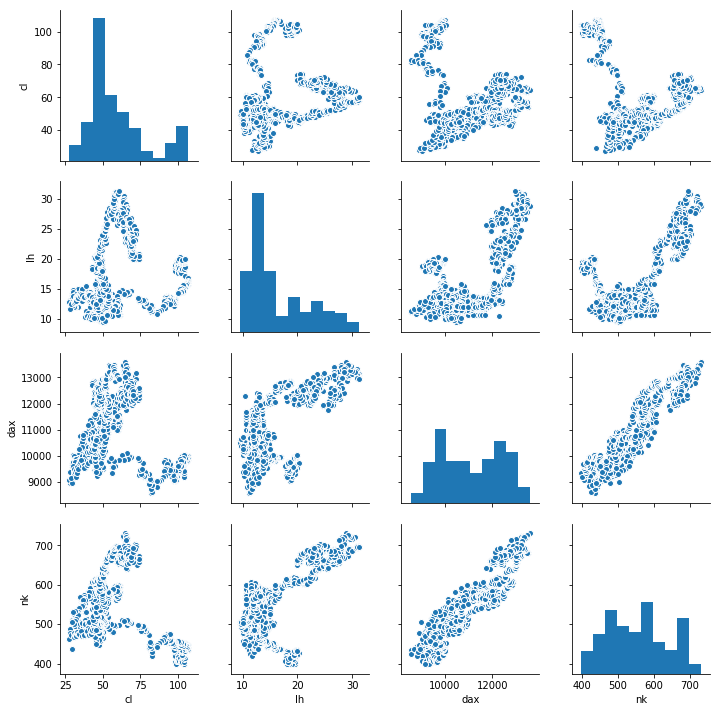

In [47]:
sns.pairplot(df)
df.describe()

/Users/ubreu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/ubreu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/ubreu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/ubreu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/ubreu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/ubreu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in l

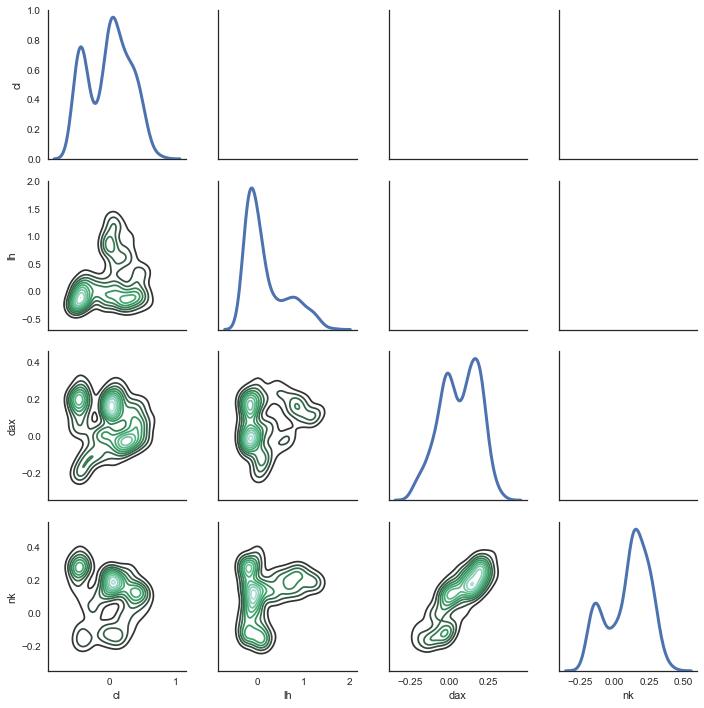

In [61]:
g = sns.PairGrid(df.pct_change(180).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)